In [157]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from classy import Class
from scipy.integrate import quad

%matplotlib inline

In [158]:
# instantiating class and assigning to cosmo object
cosmo = Class()

In [166]:
# defining cosmological parameters

params = dict(output = 'mPk',
              z_pk = 30,
              A_s = 2.3e-9,
              n_s = 0.9624, 
              h = 0.6711,
              omega_b = 0.022068,
              omega_cdm = 0.12029)
# setting params
cosmo.set(params)

True

In [167]:
# run code
cosmo.compute()

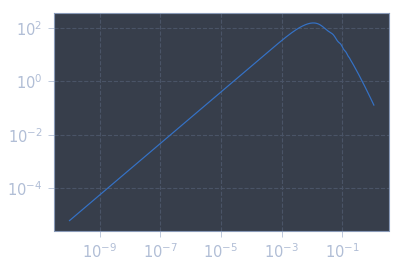

In [168]:
ks = np.logspace(-10,np.log10(1.118),500)
pk_lin = [cosmo.pk_lin(k,cosmo.pars['z_pk']) for k in ks]
plt.loglog(ks,pk_lin)

plt.show()

Correlation function:
$$\xi(r) = \int \dfrac{dk}{2 \pi^2} k^2 P(k) \dfrac{\sin kr}{kr}$$

In [169]:
# integrand
def integrand(k, r, cosmo):
    """Integrand to get correlation function.
    Arguments:
     - k : float or array, scales to integrate over
     - r : float, comoving distance
     - cosmo : CLASS's computed instance."""
    z = cosmo.pars['z_pk']
    num = k*cosmo.pk_lin(k,z)*np.sin(k*r)
    den = 2*(np.pi**2)*r
    return num/den

In [170]:
# correlation function
def xi(r,cosmo):
    int_r = lambda k: integrand(k,r,cosmo)
    return quad(int_r,0,1.118)[0]

xi = np.vectorize(xi)

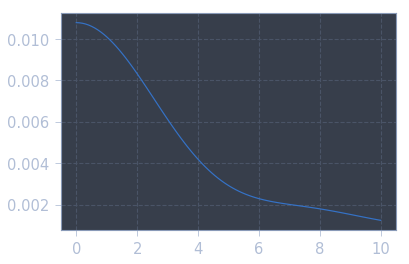

In [171]:
r = np.linspace(1e-5,10,100)
plt.plot(r,xi(r,cosmo))
#plt.xscale('log')
#plt.yscale('log')
plt.show()

In [165]:
# free up memory before changing params
cosmo.struct_cleanup()
# changing cosmology
cosmo.empty()